In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys 
import scipy
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from scipy.io import arff
from sklearn.metrics import precision_score

import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/SUPERVISED/classification/bankruptcy-prediction")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\SUPERVISED\classification\bankruptcy-prediction


In [50]:
data = arff.loadarff("3year.csv")
df = pd.DataFrame(data[0])
print(df.shape)
df.head()

(10503, 65)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,0.56453,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [51]:
# Inspect DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

We know all our features are numerical except our target feature and that we have missing data.

# Exploration

In [52]:
df['class'].value_counts()

b'0'    10008
b'1'      495
Name: class, dtype: int64

In [53]:
df['bankrupt'] = df['class'].str.decode('utf-8').astype(int).astype(bool)
df.drop(columns=['class'], inplace=True) 
df['bankrupt'].value_counts()

False    10008
True       495
Name: bankrupt, dtype: int64

It's a good idea to do some visualizations to see if there are any interesting trends or ideas we should keep in mind while we work. First, let's take a look at how many firms are bankrupt, and how many are not.

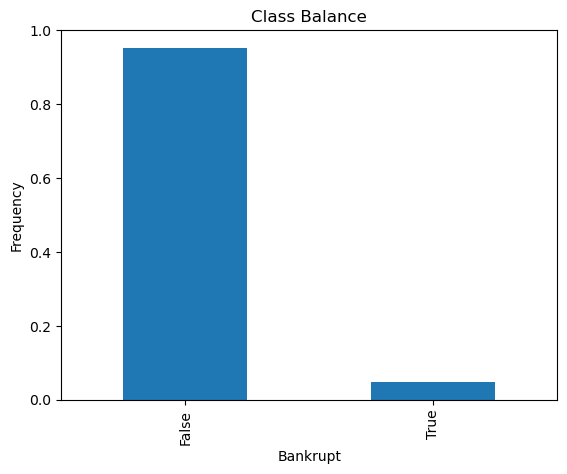

In [55]:
# Plot class balance
df['bankrupt'].value_counts(normalize = True).plot(

    kind = 'bar',
    xlabel = 'Bankrupt',
    ylabel = 'Frequency',
    title = 'Class Balance'
);

Since it looks like most of the companies in our dataset are doing all right for themselves, let's drill down a little farther. However, it also shows us that we have an imbalanced dataset, where our majority class is far bigger than our minority class. There is a clas imbalance

## Attr27

In [ ]:
# Summary statistics for `Attr_27`
df['Attr27'].describe().apply('{0:,.0f}'.format)

count        9,788
mean         1,186
std         34,691
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: Attr27, dtype: object

### Visualize Skewness

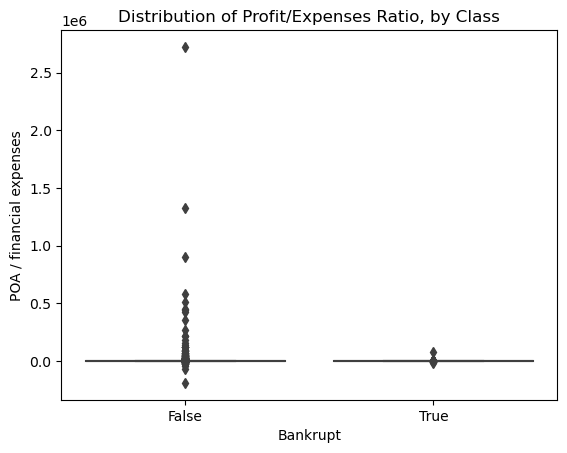

In [57]:
# Create boxplot
sns.boxplot(x = 'bankrupt', y = 'Attr27', data = df)
plt.xlabel("Bankrupt")
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

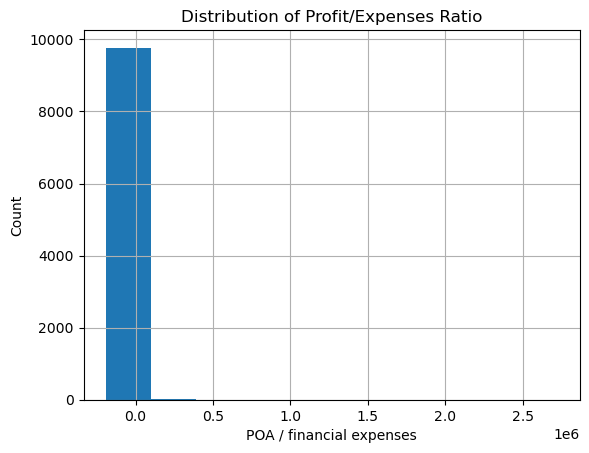

In [ ]:
# Plot histogram of `Attr_27`
df['Attr27'].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

We saw it in the numbers and now we see it in the histogram. The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

### Addressing Skewness

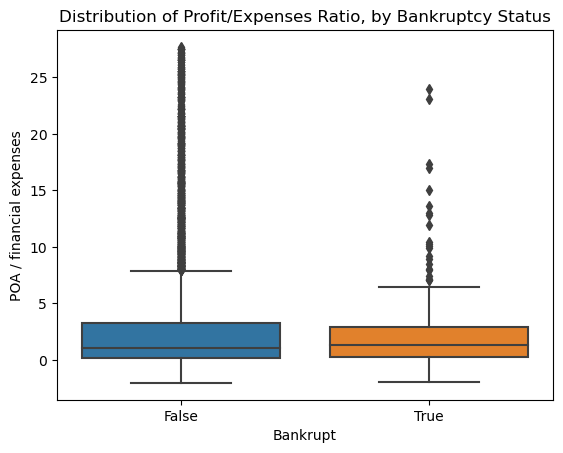

In [60]:
# Create clipped boxplot
q1, q9 = df['Attr27'].quantile([0.1,0.9])
mask = df['Attr27'].between(q1, q9)
sns.boxplot(x = 'bankrupt', y = 'Attr27', data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

## Attr31

In [63]:
# Explore another feature
# Summary statistics for `Attr_31`
df['Attr31'].describe().apply('{0:,.0f}'.format)

count    10,460
mean         -0
std          11
min        -771
25%           0
50%           0
75%           0
max          60
Name: Attr31, dtype: object

### Visualize Skewness

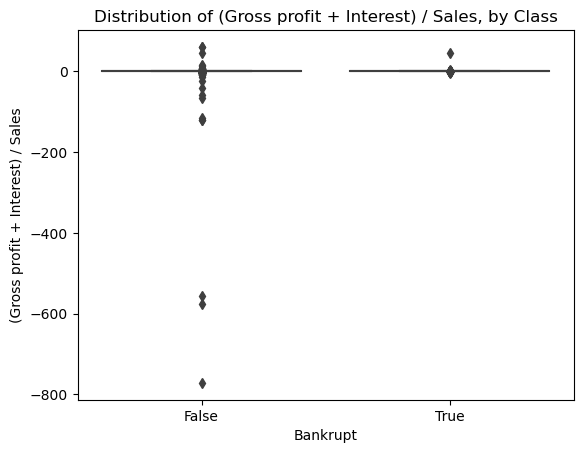

In [65]:
# Create boxplot
sns.boxplot(x = 'bankrupt', y = 'Attr31', data = df)
plt.xlabel("Bankrupt")
plt.ylabel("(Gross profit + Interest) / Sales")
plt.title("Distribution of (Gross profit + Interest) / Sales, by Class");

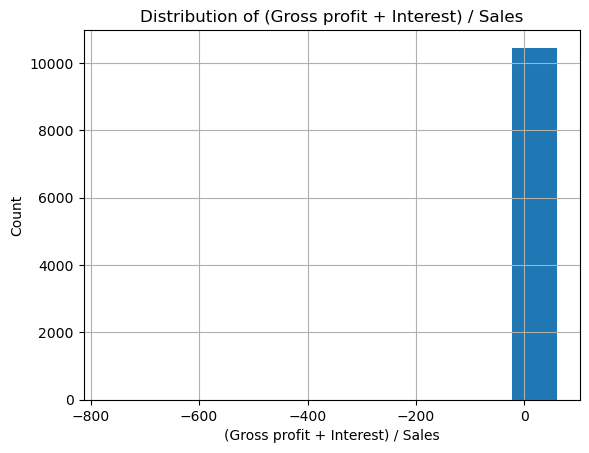

In [66]:
# Plot histogram of `feat_31`
df['Attr31'].hist()
plt.xlabel("(Gross profit + Interest) / Sales")
plt.ylabel("Count"),
plt.title("Distribution of (Gross profit + Interest) / Sales");

### Addressing skewness

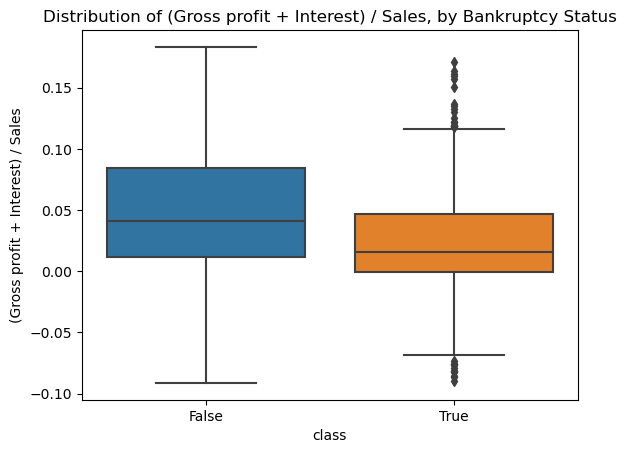

In [68]:
q1, q9 = df['Attr31'].quantile([0.1, 0.9])
mask = df['Attr31'].between(q1, q9)

sns.boxplot(x = 'bankrupt', y = 'Attr31', data = df[mask])
plt.xlabel("class")
plt.ylabel("(Gross profit + Interest) / Sales")
plt.title("Distribution of (Gross profit + Interest) / Sales, by Bankruptcy Status");

- Looking at other features, we can see that they're skewed, too. This will be important to keep in mind when we decide what type of model we want to use.

- Another important consideration for model selection is whether there are any issues with multicollinearity in our model. Let's check.

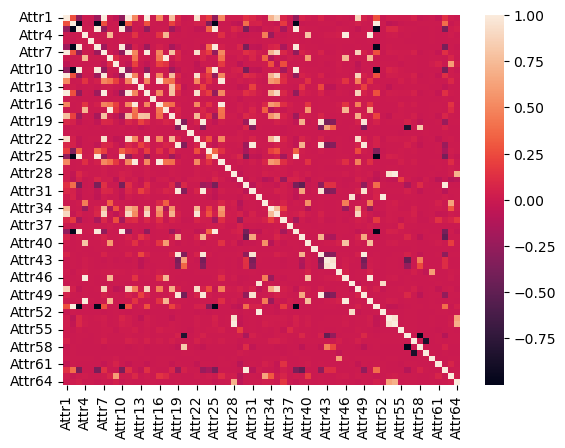

In [69]:
corr = df.drop(columns = 'bankrupt').corr()
sns.heatmap(corr);

## Split

In [70]:
target = "bankrupt"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10503, 64)
y shape: (10503,)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8402, 64)
y_train shape: (8402,)
X_test shape: (2101, 64)
y_test shape: (2101,)


### Resample
Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data

In [73]:
over_sampler = RandomOverSampler(random_state = 42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(16028, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.013739,0.48424,0.335830,3.28400,28.116,0.00000,0.017206,1.0651,1.36290,0.51576,...,5550.80,0.014543,0.026638,0.98749,0.000000,5.8807,5.7658,39.379,9.2689,2.6354
1,0.055586,0.28747,0.340460,2.21220,41.783,0.15219,0.065999,2.1786,0.92951,0.62626,...,5034.80,-0.075836,0.088758,1.07580,0.010533,11.7840,5.4632,62.549,5.8354,4.3283
2,0.125190,0.21204,-0.043561,0.76704,-26.932,0.42740,0.155220,3.7142,1.17620,0.78757,...,-5127.20,0.149790,0.158960,0.85021,0.031808,68.9750,10.7120,63.477,5.7501,1.2553
3,0.271490,0.34761,0.419280,2.24250,300.000,0.12908,0.303200,1.8768,8.68160,0.65239,...,1322.00,0.038724,0.416140,0.98078,0.000000,147.9600,149.5800,14.188,25.7270,35.6880
4,0.485420,0.38138,0.618620,2.62200,372.120,0.00000,0.596450,1.6220,2.96690,0.61862,...,490.72,0.200640,0.784690,0.81596,0.000000,NaN,4.2876,46.919,7.7793,NaN


# Build Decision Tree Model

## Baseline

In [74]:
acc_baseline = y_train.value_counts(normalize = True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9538


### Iterate

In [ ]:
# Fit on `X_train_over`, `y_train_over`
model_dt = make_pipeline(
    SimpleImputer(strategy = 'median'),
    DecisionTreeClassifier(random_state = 42)
)
model_dt.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [ ]:
acc_train = model_dt.score(X_train, y_train)
acc_test = model_dt.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9453


 A "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

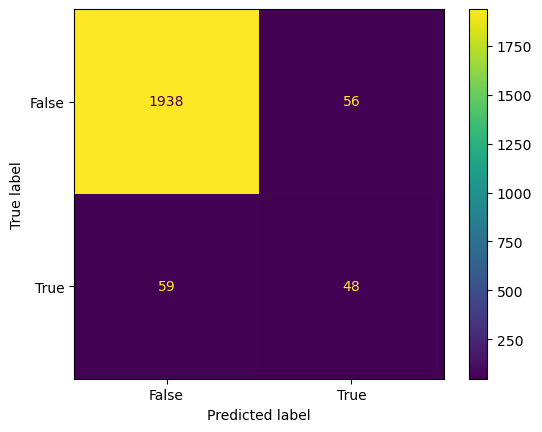

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_dt, X_test, y_test);

In [ ]:
depth = model_dt.named_steps['decisiontreeclassifier'].get_depth()
print(depth)

36


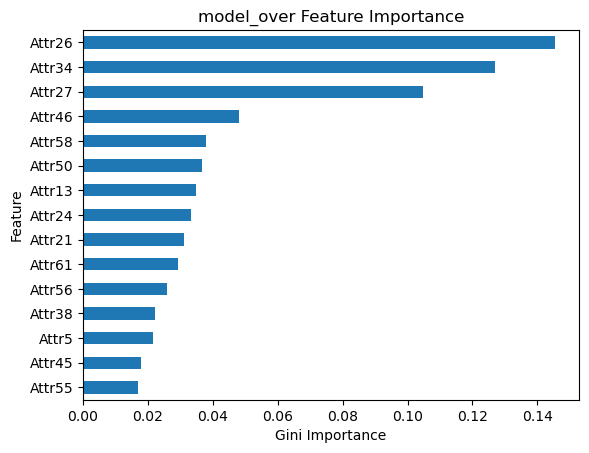

In [ ]:
# Get importances
importances = model_dt.named_steps['decisiontreeclassifier'].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index = X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

# Build Random Forest Model

In [ ]:
clf = make_pipeline(
    SimpleImputer(),
    RandomForestClassifier(random_state = 42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [ ]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv = 5, n_jobs = -1)
print(cv_acc_scores)

[0.99656893 0.99781659 0.99781659 0.99625585 0.99812793]


In [ ]:
params = {
    'randomforestclassifier__n_estimators': ['mean', 'median'],
    'randomforestclassifier__n_estimators': range(25,100,25),
    'randomforestclassifier__max_depth':range(10, 50, 10)
}

model_rf = GridSearchCV(
    clf,
    param_grid=params,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

# Train model
model_rf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_rf.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.807095,0.482593,0.129259,0.026020,10,25,"{'randomforestclassifier__max_depth': 10, 'ran...",0.976606,0.972863,0.984092,0.973167,0.978159,0.976978,0.004089,12
1,27.433569,5.064655,0.142327,0.013446,10,50,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979102,0.976606,0.983157,0.972543,0.981591,0.978600,0.003758,11
2,25.690309,0.988798,0.208599,0.032817,10,75,"{'randomforestclassifier__max_depth': 10, 'ran...",0.980973,0.977230,0.979414,0.975351,0.981279,0.978849,0.002262,10
3,9.336357,0.181862,0.079288,0.014337,20,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994697,0.997817,0.996257,0.995320,0.995632,0.995945,0.001063,9
4,17.100019,0.343696,0.143617,0.019610,20,50,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995633,0.997817,0.996881,0.995320,0.997192,0.996568,0.000946,8
5,25.407968,0.133299,0.190293,0.016064,20,75,"{'randomforestclassifier__max_depth': 20, 'ran...",0.995321,0.997817,0.997193,0.995632,0.997504,0.996693,0.001018,7
6,8.723871,0.188098,0.072439,0.007405,30,25,"{'randomforestclassifier__max_depth': 30, 'ran...",0.995945,0.998129,0.997193,0.995320,0.997192,0.996756,0.000998,6
7,17.041035,0.219333,0.140276,0.009243,30,50,"{'randomforestclassifier__max_depth': 30, 'ran...",0.997193,0.997817,0.997817,0.996256,0.997816,0.997380,0.000612,1
8,25.746366,0.222682,0.191588,0.028029,30,75,"{'randomforestclassifier__max_depth': 30, 'ran...",0.996257,0.997817,0.997817,0.996568,0.997816,0.997255,0.000695,3
9,8.699119,0.173936,0.085262,0.019639,40,25,"{'randomforestclassifier__max_depth': 40, 'ran...",0.996257,0.998129,0.997505,0.995632,0.997504,0.997005,0.000917,5


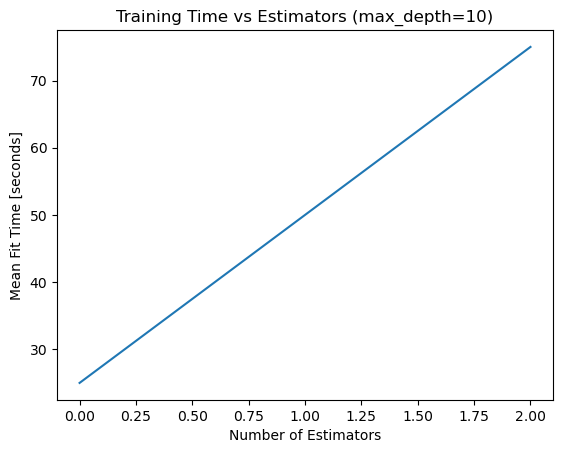

In [87]:
# Create mask
mask = cv_results['param_randomforestclassifier__max_depth'] == 10
# Plot fit time vs n_estimators
plt.plot(
    cv_results[mask]['param_randomforestclassifier__n_estimators'],
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

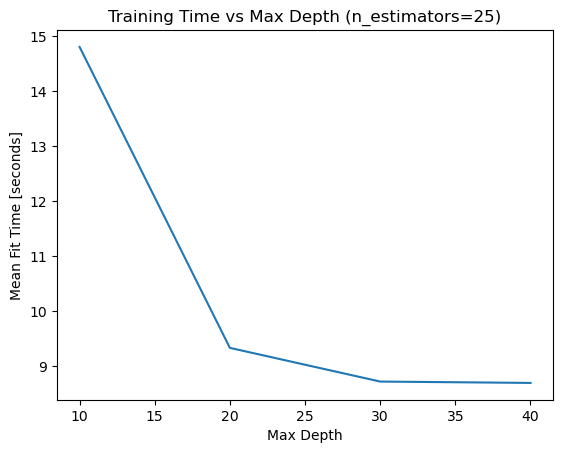

In [88]:
# Create mask
mask = cv_results['param_randomforestclassifier__n_estimators'] == 25
# Plot fit time vs max_depth
plt.plot(
    cv_results[mask]['param_randomforestclassifier__max_depth'],
    cv_results[mask]['mean_fit_time']
)
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [ ]:
# Extract best hyperparameters
model_rf.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50}

### Evaluate

In [ ]:
acc_train = model_rf.score(X_train, y_train)
acc_test = model_rf.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9591


### Communicate

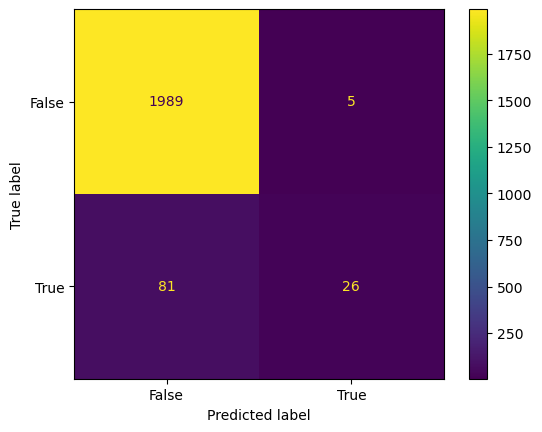

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test);

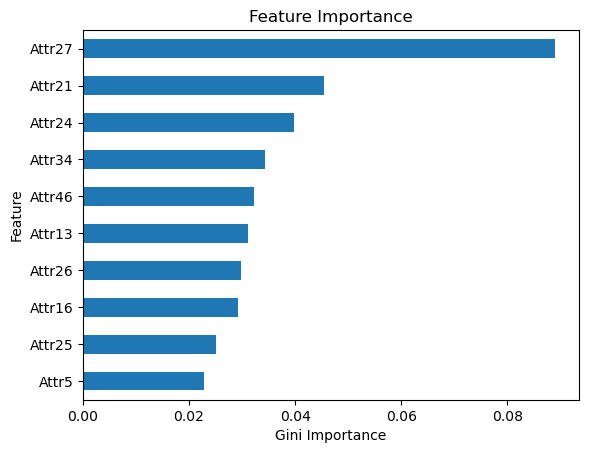

In [ ]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model_rf.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind = 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# Gradient Boosting Model

In [96]:
clf = make_pipeline(
    SimpleImputer(),
    GradientBoostingClassifier()
)

In [ ]:
params = {'simpleimputer__strategy': ['mean', 'median'],
         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
         'gradientboostingclassifier__max_depth': range(2,5)
}

model_gb = GridSearchCV(clf, param_grid=params, cv = 5, n_jobs = -1, verbose = 1)

# Fit model to over-sampled training data
model_gb.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
results = pd.DataFrame(model_gb.cv_results_)
results.sort_values("rank_test_score").head(10)

In [ ]:
# Extract best hyperparameters
model_gb.best_params_

## Evaluate

In [ ]:
acc_train = model_gb.score(X_train, y_train)
acc_test = model_gb.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_gb, X_test, y_test);

In [ ]:
# Print classification report
print(classification_report(y_test, model_gb.predict(X_test)))

In [ ]:
c = ConfusionMatrixWidget(model_gb, X_test, y_test)
c.show()

### Save model

In [ ]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = wrangle(data_filepath)
    # Load model
    with open(model_filepath, 'rb') as f:
        model = pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd_Series(y_test_pred, index = X_test.index, name = 'bankrupt')
    return y_test_pred

In [ ]:
y_test_pred = make_predictions(
    data_filepath="data/poland-bankruptcy-data-2009-mvp-features.json.gz",
    model_filepath="model-5-3.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

In [ ]:
# Save your model as `"model-5-2.pkl"`
with open('model-5-2.pkl', 'wb') as f:
    pickle.dump(model_over, f)

### Load model

In [ ]:
# Load `"model-5-2.pkl"`
with open('model-5-2.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
print(loaded_model)